In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Initalise Dataframe

In [7]:
data = pd.read_csv("analysis_dataframe.csv")

## Summarising current loan recovery and projecting repayments

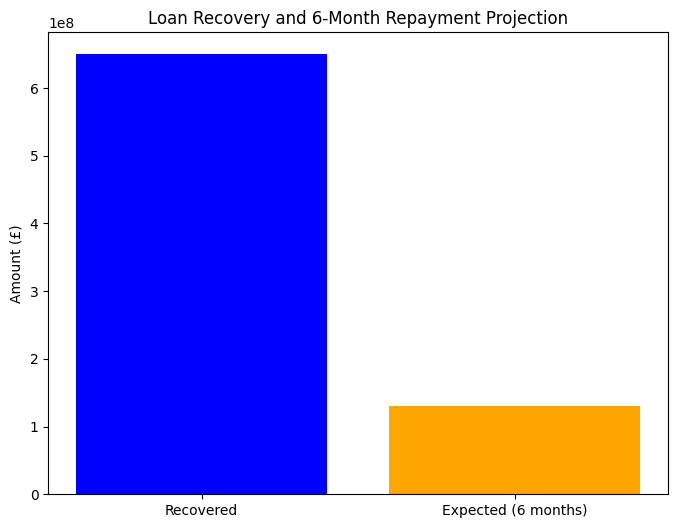

Recovery percentage = 79.2142694756642
Six month repayment = 130158940.26


In [14]:
# Calculate the percentage of recovered loans compared to total expected repayment
total_recovered = data['total_rec_prncp'].sum() + data['total_rec_int'].sum()
total_expected = data['loan_amount'].sum() * (1 + data['int_rate'].mean() / 100)

recovery_percentage = (total_recovered / total_expected) * 100

# Calculate repayment projection for the next 6 months
monthly_repayment = data['instalment'].sum()
six_month_repayment = monthly_repayment * 6


plt.figure(figsize=(8, 6))
plt.bar(['Recovered', 'Expected (6 months)'], [total_recovered, six_month_repayment], color=['blue', 'orange'])
plt.ylabel('Amount (£)')
plt.title('Loan Recovery and 6-Month Repayment Projection')
plt.show()

print(f"Recovery percentage = {recovery_percentage}")
print(f"Six month repayment = {six_month_repayment}")


## Analysing charged-off loans

In [16]:
# Calculate percentage of loans charged off
charged_off_loans = data[data['loan_status'] == 'Charged Off']
charged_off_percentage = (len(charged_off_loans) / len(data)) * 100

# Total amount paid towards charged-off loans
charged_off_paid = charged_off_loans['total_rec_prncp'].sum() + charged_off_loans['total_rec_int'].sum()

print(f"Percentage of charged off loans = {charged_off_percentage}")
print(f"Total amount paid towards these loans before being charged off = {charged_off_paid}")

Percentage of charged off loans = 10.272722243735133
Total amount paid towards these loans before being charged off = 32538468.78


## Cell 3: Projecting expected losses from charged-off loans

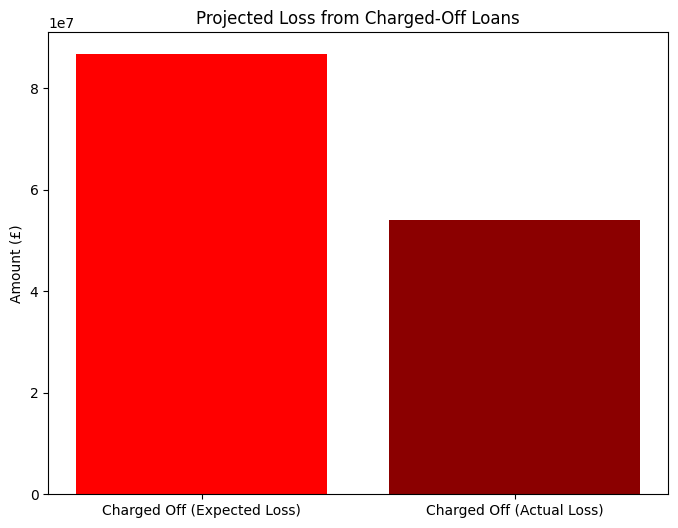

In [17]:
# Project losses from charged-off loans
charged_off_loss = charged_off_loans['loan_amount'].sum() * (1 + data['int_rate'].mean() / 100)
actual_loss = charged_off_loss - charged_off_paid

# Visualise losses
plt.figure(figsize=(8, 6))
plt.bar(['Charged Off (Expected Loss)', 'Charged Off (Actual Loss)'], [charged_off_loss, actual_loss], color=['red', 'darkred'])
plt.ylabel('Amount (£)')
plt.title('Projected Loss from Charged-Off Loans')
plt.show()

## Cell 4: Customers behind on payments

In [18]:
# Identify customers behind on payments
late_customers = data[data['loan_status'].str.contains('Late')]
late_percentage = (len(late_customers) / len(data)) * 100

# Loss if these loans convert to Charged Off
late_loan_loss = late_customers['loan_amount'].sum() * (1 + data['int_rate'].mean() / 100)

# Total impact of Charged Off + Late if all convert
combined_loss = charged_off_loss + late_loan_loss
total_revenue = total_expected
loss_percentage = (combined_loss / total_revenue) * 100

print(f"Percentage of loans currently late: {late_percentage}%")
print(f"Total loan amount at risk due to late payments: £{late_loan_loss}")
print(f"Percentage of total expected revenue represented by late and charged-off loans: {loss_percentage}%")

Percentage of loans currently late: 1.2649591562021723 %
Total loan amount at risk due to late payments: £11691022.2519688
Percentage of total expected revenue represented by late and charged-off loans: 11.985378099275994 %


## Cell 5: Visualising indicators of loan default

/var/folders/t7/qw8cndf54cz8sll64n_trl_00000gn/T/ipykernel_54568/3443894834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(indicator_counts.index, rotation=45, ha='right')
/var/folders/t7/qw8cndf54cz8sll64n_trl_00000gn/T/ipykernel_54568/3443894834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(indicator_counts.index, rotation=45, ha='right')
/var/folders/t7/qw8cndf54cz8sll64n_trl_00000gn/T/ipykernel_54568/3443894834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(indicator_counts.index, rotation=45, ha='right')


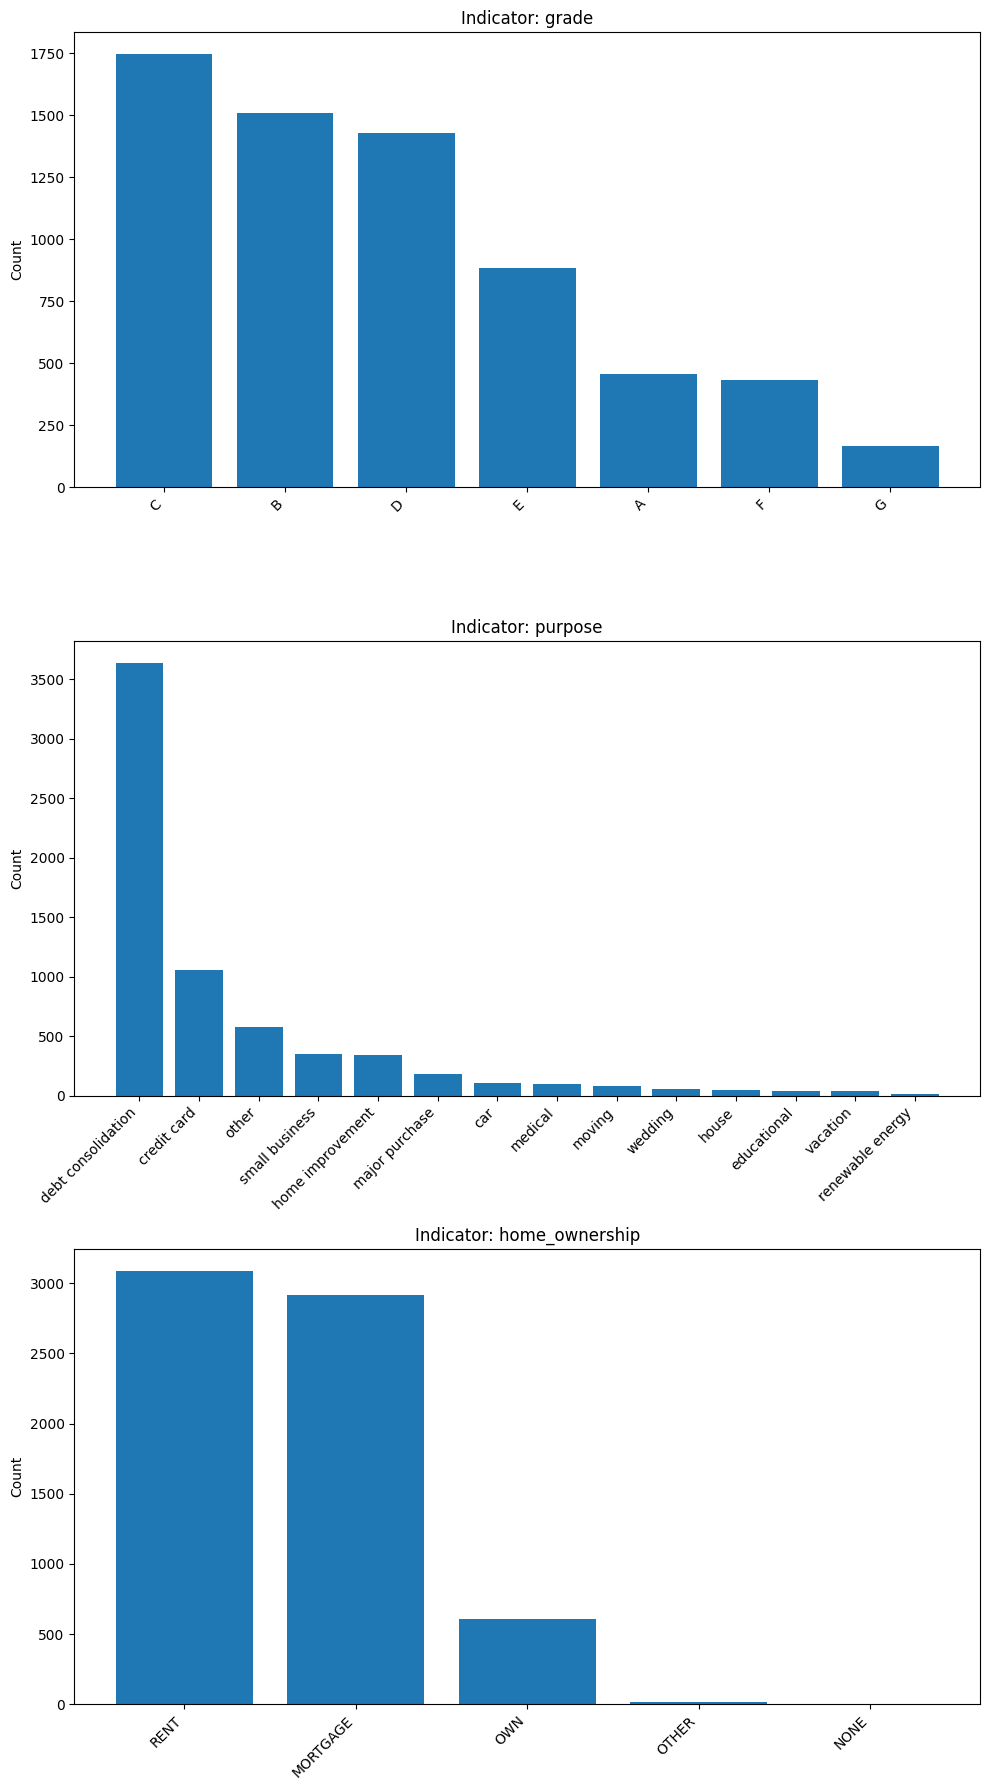

In [13]:
# Analyze and visualize one indicator at a time
indicators = ['grade', 'purpose', 'home_ownership']
fig, axes = plt.subplots(len(indicators), 1, figsize=(10, 18))

for i, indicator in enumerate(indicators):
    indicator_counts = charged_or_late[indicator].value_counts()
    axes[i].bar(indicator_counts.index, indicator_counts.values)
    axes[i].set_title(f'Indicator: {indicator}')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(indicator_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()